In [4]:
import os
import re 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import manifold
from unionfind import unionfind
from sklearn.cluster import KMeans,OPTICS,DBSCAN
import sklearn
import matplotlib.cm as cm
import torch

In [19]:
test

[101.58345140441426,
 99.09705318089276,
 99.5791959862605,
 98.9500037534285,
 98.5070855993509,
 100.15815119109915,
 98.99203452478272,
 99.7712703480848,
 101.43406544388776,
 101.3409475421222]

In [20]:
test = [np.random.normal(size = 10) for i in range(10)]
print(np.corrcoef(test))

[[ 1.          0.15183628  0.12875775  0.19397824 -0.22789693  0.36983698
  -0.44091248 -0.27093693 -0.43049827  0.230281  ]
 [ 0.15183628  1.          0.31283164  0.14120474 -0.26564084  0.10675492
   0.07099591  0.12440359 -0.82445544  0.5790725 ]
 [ 0.12875775  0.31283164  1.          0.19834102  0.4133011   0.31555626
   0.10467015  0.44390743 -0.55066944  0.66019894]
 [ 0.19397824  0.14120474  0.19834102  1.         -0.13488459  0.1168977
   0.01652683 -0.04792663 -0.34261818  0.28798494]
 [-0.22789693 -0.26564084  0.4133011  -0.13488459  1.          0.41941723
   0.64115686 -0.08768381  0.33263759  0.00975642]
 [ 0.36983698  0.10675492  0.31555626  0.1168977   0.41941723  1.
   0.3186977  -0.39368017 -0.32428712  0.40798018]
 [-0.44091248  0.07099591  0.10467015  0.01652683  0.64115686  0.3186977
   1.         -0.3448652   0.15267955  0.13850649]
 [-0.27093693  0.12440359  0.44390743 -0.04792663 -0.08768381 -0.39368017
  -0.3448652   1.         -0.19843772  0.22083831]
 [-0.43049

In [6]:
dfc = np.load('/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/inputs.npy')

In [13]:
np.sum(dfc[70,:,:] > 0.1)

3940

In [124]:
ls /neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/pypreclin

components_analysis/                          ml_kmeans/
deeplearn_barlowtwins/                        nsm/
deeplearn_dvae/                               nsm_timeseries/
deeplearn_stvae_simulation/                   peaks_analysis/
deeplearn_tdvae/                              pypreclin/
dfc_dists/                                    pypreclin_surfaces/
dictlearn_functional_codes_and_topographies/  pypreclin_timeseries/
eeg_prepoc/                                   reference_kmeans/


In [ ]:
ls /neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/code

In [88]:
timeseries = np.load("/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/nsm_timeseries/cocomac/timeseries.npy")
meta = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/metadata.tsv", sep="\t")
id_sessions = np.array([i for i in range(len(meta)//464) if meta["condition"].iloc[i*464] in ["awake","light-propofol","deep-propofol"]])
timeseries = np.swapaxes(timeseries[id_sessions,:,:],1,2)

In [71]:
def correlation(timeseries,win_size):
    l = np.zeros((86,500-win_size+1,82,82))
    for session in range(86): 
        for i in range(500-win_size+1):
            X = timeseries[session,:,:i+win_size]
            l[session,i,:,:] = np.corrcoef(X)
    return l

In [89]:
C = correlation(timeseries,500)

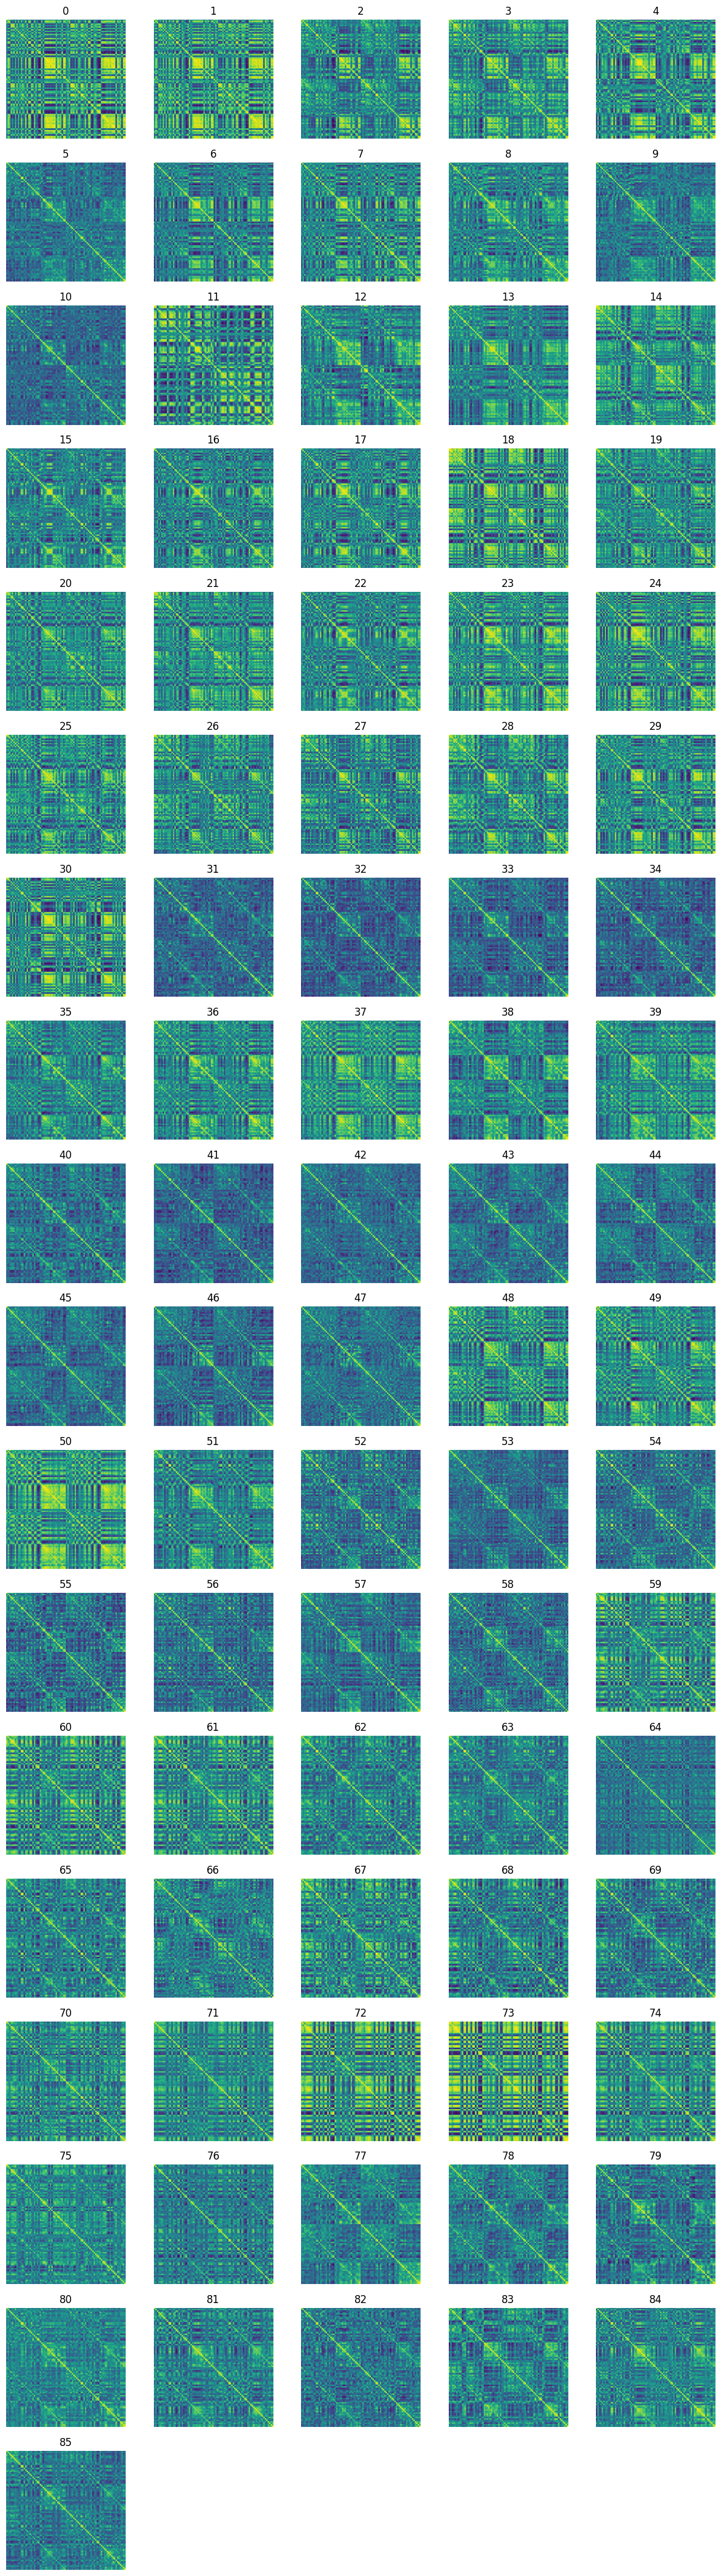

In [91]:
n = 86
rows = n // 5 + 1
columns = 5
fig = plt.figure(figsize=(15, rows * 3))

for i in range(n):
    fig.add_subplot(rows, columns, i+1)
    # showing image
    plt.imshow(C[i,0,:,:])
    plt.title(i)
    plt.axis('off')

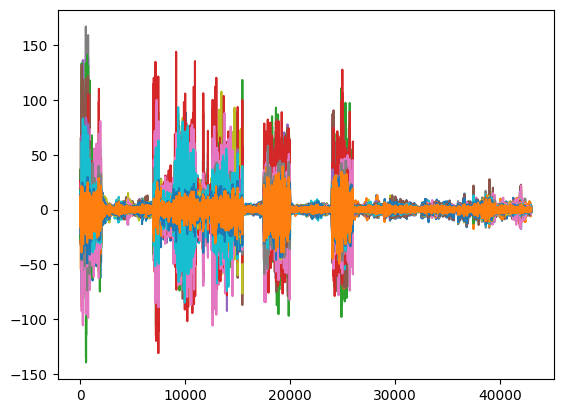

In [123]:
for i in range(82):
    plt.plot(np.concatenate([timeseries[session,i,:] for session in range(86)]))

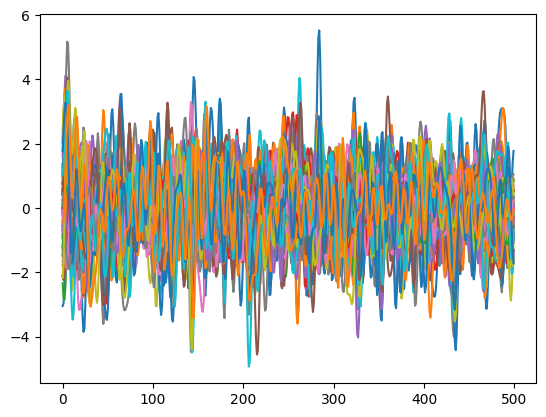

In [113]:
for i in range(82):
    plt.plot(timeseries[31,i,:])

In [104]:
np.mean(np.abs(timeseries[80,:,:]))

1.2423329191792294

In [103]:
np.mean(np.abs(timeseries[14,:,:]))

9.468545590210425

## ANIMATION